## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 10 is due on 5/15/2025

# Missing Data

Load up the Boston Housing Data and separate into matrix `X` for the features and vector `y` for the response. Randomize the rows

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Load the Boston housing data from the provided URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)


#This creates a full set of predictors for each observation.
X_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

#The response y is stored in the third column of the second row of each pair.
y = raw_df.values[1::2, 2]

#Add an intercept column (like R's model.matrix does automatically)
X = sm.add_constant(X_data)

#Define column names using the provided names
col_names = np.concatenate((["Intercept"], 
                            ["CRIM", "ZN", "INDUS", "CHAS", "NOX", 
                             "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]))

# Convert the numpy arrays to pandas DataFrames with column names
X_df = pd.DataFrame(X, columns=col_names)
y_df = pd.DataFrame(y, columns=["medv"])

#  the dimensions to verify
print("Number of predictors (including intercept):", X_df.shape[1])
print("Number of observations:", X_df.shape[0])

#Display the first few rows of the DataFrames
print(X_df.head())
print(y_df.head())

Number of predictors (including intercept): 14
Number of observations: 506
   Intercept     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0        1.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1        1.0  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2        1.0  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3        1.0  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4        1.0  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  
0  296.0     15.3  396.90   4.98  
1  242.0     17.8  396.90   9.14  
2  242.0     17.8  392.83   4.03  
3  222.0     18.7  394.63   2.94  
4  222.0     18.7  396.90   5.33  
   medv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [2]:
combined_df = pd.concat([X_df, y_df], axis = 1)
combined_df

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
#Randomize the rows by shuffling the indices
shuffled_indices = np.random.permutation(combined_df.index)
combined_df = combined_df.loc[shuffled_indices].reset_index(drop = True)
combined_df

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,1.0,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64,16.8
1,1.0,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51,13.9
2,1.0,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8
3,1.0,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2
4,1.0,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52,24.5
502,1.0,0.19657,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15,20.5
503,1.0,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24.0,666.0,20.2,319.98,15.70,14.2
504,1.0,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6


In [4]:
#This removes the 'medv' column from combined_df and returns it as a Series, which we then convert to a DataFrame.
y_df = combined_df.pop('medv').to_frame()
X_df = combined_df

print(y_df)
X_df

     medv
0    16.8
1    13.9
2    13.8
3    22.2
4    17.2
..    ...
501  24.5
502  20.5
503  14.2
504  37.6
505  13.5

[506 rows x 1 columns]


,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64
1,1.0,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
2,1.0,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14
3,1.0,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22
4,1.0,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52
502,1.0,0.19657,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15
503,1.0,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24.0,666.0,20.2,319.98,15.70
504,1.0,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13


Similar to lab 1, write a function that takes a matrix and punches holes (i.e. sets entries equal to `NA`) randomly with an argument `prob_missing`

In [5]:
def punch_holes(matrix, prob_missing):
    """
    Randomly sets entries in a matrix to NA based on the given probability.

    Parameters:
    -----------
    matrix : pandas.DataFrame or numpy.ndarray
        The input matrix in which to punch holes.
    prob_missing : float
        The probability (between 0 and 1) that any given entry is set to NA.

    Returns:
    --------
    matrix_with_holes : same type as input
        A copy of the original matrix with entries randomly set to NA.
    """
    #Create a boolean mask with True values where we want to set NA
    mask = np.random.choice([True, False], size=matrix.shape, p=[prob_missing, 1 - prob_missing])
    
    #If matrix is a DataFrame, make a copy and set the mask locations to np.nan
    if isinstance(matrix, pd.DataFrame):
        matrix_with_holes = matrix.copy()
        matrix_with_holes[mask] = np.nan
    #If matrix is a numpy array, copy it and set the mask locations to np.nan
    elif isinstance(matrix, np.ndarray):
        matrix_with_holes = matrix.copy()
        #If the array has an integer dtype, convert to float so it can hold np.nan
        if np.issubdtype(matrix_with_holes.dtype, np.integer):
            matrix_with_holes = matrix_with_holes.astype(float)
        matrix_with_holes[mask] = np.nan
    else:
        raise TypeError("Input must be a pandas DataFrame or a numpy array")
    
    return matrix_with_holes

Create a matrix `Xmiss` which is `X` but has missingness with probability of 10% using the function you just wrote. 

In [6]:
#Create Xmiss by introducing 10% missingness using the punch_holes function:
Xmiss = punch_holes(X_df, prob_missing = 0.1)

#Display Xmiss to verify the missing entries
print("Matrix X with 10% missing values:")
print(Xmiss)

Matrix X with 10% missing values:
     Intercept      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  \
0          1.0   4.22239   0.0  18.10   1.0  0.770  5.803   89.0  1.9047   
1          1.0       NaN   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   
2          1.0   8.05579   0.0  18.10   0.0  0.584  5.427   95.4     NaN   
3          1.0       NaN  30.0   4.93   0.0  0.428  6.358   52.9     NaN   
4          1.0  14.05070   0.0  18.10   NaN    NaN  6.657  100.0  1.5275   
..         ...       ...   ...    ...   ...    ...    ...    ...     ...   
501        1.0   0.16439  22.0   5.86   0.0  0.431  6.433   49.1  7.8265   
502        1.0   0.19657  22.0   5.86   0.0  0.431  6.226   79.2  8.0555   
503        1.0   7.02259   0.0  18.10   0.0  0.718  6.006   95.3  1.8746   
504        1.0   0.38214   0.0   6.20   0.0  0.504    NaN   86.5  3.2157   
505        1.0   8.20058   0.0  18.10   0.0    NaN  5.936   80.3  2.7792   

      RAD    TAX  PTRATIO       B  LSTAT  
0    24.0 

Also, generate the M matrix and delete columns that have no missingness.

In [7]:
#Create the indicator matrix M: Each entry in M is 1 if the corresponding entry in Xmiss is NA, and 0 otherwise.
M = Xmiss.isna().astype(int)

#Rename the columns of M by prefixing "is_missing_" to the original column names.
M.columns = ["is_missing_" + col for col in Xmiss.columns]

#Delete (i.e. drop) columns that have no missingness (columns whose sum is 0).
M = M.loc[:, M.sum() > 0]

#print M to verify
print("Indicator matrix M (only columns with missing values):")
print(M)

Indicator matrix M (only columns with missing values):
     is_missing_Intercept  is_missing_CRIM  is_missing_ZN  is_missing_INDUS  \
0                       0                0              0                 0   
1                       0                1              0                 0   
2                       0                0              0                 0   
3                       0                1              0                 0   
4                       0                0              0                 0   
..                    ...              ...            ...               ...   
501                     0                0              0                 0   
502                     0                0              0                 0   
503                     0                0              0                 0   
504                     0                0              0                 0   
505                     0                0              0                 0 

Split the first 400 observations were the training data and the remaining observations are the test set. For Xmiss, cbind on the M so the model has a chance to fit on "is missing" as we discussed in class

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

#Combine Xmiss and M (column-wise, similar to R's cbind)
Xmiss_with_M = pd.concat([Xmiss, M], axis = 1)

#Split the data: The first 400 observations will be the training set,The remaining observations will be the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 400, shuffle = False)

#Do the same for the combined Xmiss_with_M:
Xmiss_train, Xmiss_test, _, _ = train_test_split(Xmiss_with_M, y, train_size = 400, shuffle = False) 

#Verify the shapes
print("X_train shape:", X_train.shape)
print("Xmiss_train shape:", Xmiss_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("Xmiss_test shape:", Xmiss_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 14)
Xmiss_train shape: (400, 28)
y_train shape: (400,)
X_test shape: (106, 14)
Xmiss_test shape: (106, 28)
y_test shape: (106,)


Fit a random forest model of `y_train ~ X_train`, report oos s_e (not oob) on `X_test`. This ignores missingness

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Instantiate and fit the random forest model on X_train and y_train
rf =  RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

#Predict on the test set
y_pred= rf.predict(X_test)

#Compute the out-of-sample standard error (root mean squared error)
oos_se = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("Out-of-sample standard error (RMSE):", oos_se)

Out-of-sample standard error (RMSE): 4.253511146743556


Impute the missingness in `Xmiss` using the feature averages to create a matrix `Ximp_naive_train` and `Ximp_naive_test`

In [10]:
from sklearn.impute import SimpleImputer

#Create an imputer that replaces missing values with the column mean
imputer = SimpleImputer(strategy = "mean")

#Fit the imputer on the training data and transform it
Ximp_naive_train = pd.DataFrame(imputer.fit_transform(Xmiss_train), columns = Xmiss_train.columns, index = Xmiss_train.index)

#Use the fitted imputer to transform the test data
Ximp_naive_test = pd.DataFrame(imputer.fit_transform(Xmiss_test), columns = Xmiss_test.columns, index = Xmiss_test.index)

#Print a preview to verify
print("Imputed Training Data:")
print(Ximp_naive_train.head())
print("Imputed Test Data:")
print(Ximp_naive_test.head())

Imputed Training Data:
   Intercept       CRIM    ZN  INDUS      CHAS       NOX     RM    AGE  \
0        1.0   4.222390   0.0  18.10  1.000000  0.770000  5.803   89.0   
1        1.0   3.463736   0.0   8.14  0.000000  0.538000  5.599   85.7   
2        1.0   8.055790   0.0  18.10  0.000000  0.584000  5.427   95.4   
3        1.0   3.463736  30.0   4.93  0.000000  0.428000  6.358   52.9   
4        1.0  14.050700   0.0  18.10  0.060109  0.556602  6.657  100.0   

        DIS   RAD  ...  is_missing_CHAS  is_missing_NOX  is_missing_RM  \
0  1.904700  24.0  ...              0.0             0.0            0.0   
1  4.454600   4.0  ...              0.0             0.0            0.0   
2  3.668529  24.0  ...              0.0             0.0            0.0   
3  3.668529   6.0  ...              0.0             0.0            0.0   
4  1.527500  24.0  ...              1.0             1.0            0.0   

   is_missing_AGE  is_missing_DIS  is_missing_RAD  is_missing_TAX  \
0             0.0 

Fit a random forest model of `y_train ~ Ximp_naive_train`, report oos s_e (not oob) on `Ximp_naive_test`.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#Instantiate the random forest regressor
rf_naive = RandomForestRegressor(random_state = 42)

#Fit the model on the imputed training data
rf_naive.fit(Ximp_naive_train, y_train)

#Predict on the imputed test data
y_pred_naive = rf_naive.predict(Ximp_naive_test)

#Compute the out-of-sample standard error (using RMSE as the metric)
oos_se_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))
print("Out-of-sample standard error (RMSE):", oos_se_naive)

Out-of-sample standard error (RMSE): 10.789112139752323


How much predictive performance was lost due to missingness when naive imputation was used vs when there was no missingness?

In [12]:
print("Complete data model OOS SE (RMSE):", oos_se)
print("Naive imputation model OOS SE (RMSE):", oos_se_naive)

#Calculate the absolute loss in performance (increase in RMSE)
performance_loss = oos_se_naive - oos_se
print("Absolute performance loss (RMSE difference):", performance_loss)

#Calculate the relative performance loss as a percentage
relative_loss = (performance_loss / oos_se) * 100
print("Relative performance loss (%):", relative_loss)

Complete data model OOS SE (RMSE): 4.253511146743556
Naive imputation model OOS SE (RMSE): 10.789112139752323
Absolute performance loss (RMSE difference): 6.535600993008767
Relative performance loss (%): 153.65190703713932


Use `missForest` to impute the missing entries to create a matrix `Ximp_MF_train` and `Ximp_MF_test`.

In [13]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


#Create an IterativeImputer using a RandomForestRegressor as the estimator. This is conceptually similar to missForest.
imputer_MF = IterativeImputer( estimator = RandomForestRegressor(random_state = 42), random_state = 42, max_iter = 10)

#Fit the imputer on the training data and transform it
Ximp_MF_train = pd.DataFrame(imputer_MF.fit_transform(Xmiss_train), columns = Xmiss_train.columns, index = Xmiss_train.index)

#Use the fitted imputer to transform the test data
Ximp_MF_test = pd.DataFrame(imputer_MF.fit_transform(Xmiss_test), columns = Xmiss_test.columns, index = Xmiss_test.index)

#Print a preview to verify
print("Imputed Training Data with MissForest-like Imputation:")
print(Ximp_MF_train.head())
print("Imputed Test Data with MissForest-like Imputation:")
print(Ximp_MF_test.head())

C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputed Training Data with MissForest-like Imputation:
   Intercept       CRIM    ZN  INDUS  CHAS      NOX     RM    AGE       DIS  \
0        1.0   4.222390   0.0  18.10   1.0  0.77000  5.803   89.0  1.904700   
1        1.0   0.947576   0.0   8.14   0.0  0.53800  5.599   85.7  4.454600   
2        1.0   8.055790   0.0  18.10   0.0  0.58400  5.427   95.4  1.911921   
3        1.0   0.109447  30.0   4.93   0.0  0.42800  6.358   52.9  6.409209   
4        1.0  14.050700   0.0  18.10   0.0  0.66823  6.657  100.0  1.527500   

    RAD  ...  is_missing_CHAS  is_missing_NOX  is_missing_RM  is_missing_AGE  \
0  24.0  ...              0.0             0.0            0.0             0.0   
1   4.0  ...              0.0             0.0            0.0             0.0   
2  24.0  ...              0.0             0.0            0.0             0.0   
3   6.0  ...              0.0             0.0            0.0             0.0   
4  24.0  ...              1.0             1.0            0.0          

C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Code to handle numerical and categorial columns

In [14]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.base import clone

def missforest_impute(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()

    #Separate columns by dtype
    num_cols = X_train.select_dtypes(include=["number"]).columns
    cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns

    #Encode categorical columns
    cat_maps = {}
    for col in cat_cols:
        categories = X_train[col].astype("category").cat.categories
        cat_maps[col] = categories
        X_train[col] = X_train[col].astype("category").cat.codes.replace(-1, np.nan)
        X_test[col] = pd.Categorical(X_test[col], categories=categories).codes
        X_test[col] = X_test[col].replace(-1, np.nan)

    # Impute numerical columns
    if len(num_cols) > 0:
        imputer_num = IterativeImputer(
            estimator=RandomForestRegressor(n_estimators=10, random_state=0),
            max_iter=10,
            random_state=0
        )
        X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
        X_test[num_cols] = imputer_num.transform(X_test[num_cols])

    #Impute categorical columns
    if len(cat_cols) > 0:
        imputer_cat = IterativeImputer(
            estimator=RandomForestClassifier(n_estimators=10, random_state=0),
            max_iter=10,
            random_state=0
        )
        X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
        X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

        #Round, convert to int, and map back to original categories
        for col in cat_cols:
            X_train[col] = X_train[col].round().astype(int)
            X_test[col] = X_test[col].round().astype(int)
            X_train[col] = pd.Categorical.from_codes(X_train[col], cat_maps[col])
            X_test[col] = pd.Categorical.from_codes(X_test[col], cat_maps[col])

    return X_train, X_test

#Example usage
Ximp_train, Ximp_test = missforest_impute(Xmiss_train, Xmiss_test)

#Preview
print("Imputed Training Data:")
print(Ximp_train.head())
print("Imputed Test Data:")
print(Ximp_test.head())

C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputed Training Data:
   Intercept       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE      DIS  \
0        1.0   4.222390   0.0  18.10   1.0  0.770  5.803   89.0  1.90470   
1        1.0   1.031528   0.0   8.14   0.0  0.538  5.599   85.7  4.45460   
2        1.0   8.055790   0.0  18.10   0.0  0.584  5.427   95.4  1.93563   
3        1.0   0.091675  30.0   4.93   0.0  0.428  6.358   52.9  6.60041   
4        1.0  14.050700   0.0  18.10   0.0  0.663  6.657  100.0  1.52750   

    RAD  ...  is_missing_CHAS  is_missing_NOX  is_missing_RM  is_missing_AGE  \
0  24.0  ...              0.0             0.0            0.0             0.0   
1   4.0  ...              0.0             0.0            0.0             0.0   
2  24.0  ...              0.0             0.0            0.0             0.0   
3   6.0  ...              0.0             0.0            0.0             0.0   
4  24.0  ...              1.0             1.0            0.0             0.0   

   is_missing_DIS  is_missing_RAD  is_m

Fit a random forest model of `y_train ~ Ximp_MF_train`, report oos s_e (not oob) on `Ximp_MF_test`.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Instantiate the random forest regressor
rf_MF = RandomForestRegressor(random_state = 42)

#Fit the model on the missForest-imputed training data
rf_MF.fit(Ximp_MF_train, y_train)

#Predict on the missForest-imputed test data
y_pred_MF = rf_MF.predict(Ximp_MF_test)

#Compute the out-of-sample standard error (using RMSE as the metric)
oos_se_MF = np.sqrt(mean_squared_error(y_test, y_pred_MF))
print("Out-of-sample standard error (RMSE) for missForest-imputed data:", oos_se_MF)

Out-of-sample standard error (RMSE) for missForest-imputed data: 10.957364381056482


How much predictive performance was lost due to missingness when `missForest` imputation was used?

In [56]:
print("Complete data model OOS SE (RMSE):", oos_se)
print("missForest-imputed model OOS SE (RMSE):", oos_se_MF)

# Calculate the absolute loss in performance (increase in RMSE)
performance_loss_MF = oos_se_MF - oos_se
print("Absolute performance loss (RMSE difference):", performance_loss_MF)

# Calculate the relative performance loss as a percentage
relative_loss_MF = (performance_loss_MF / oos_se) * 100
print("Relative performance loss (%):", relative_loss_MF)

Complete data model OOS SE (RMSE): 4.253511146743556
missForest-imputed model OOS SE (RMSE): 10.781705089273935
Absolute performance loss (RMSE difference): 6.528193942530379
Relative performance loss (%): 153.47776736234243


Why did `missForest` imputation perform better than naive imputation?

if you increase max iter which here we set = 10 relative performance should increase 

Reload the feature matrix:

In [57]:
print(y_df)
X_df

     medv
0    19.0
1    27.9
2    43.5
3    22.9
4    23.1
..    ...
501  37.3
502  12.6
503  17.5
504  13.3
505  22.8

[506 rows x 1 columns]


,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15
1,1.0,11.95110,0.0,18.10,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13
2,1.0,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
3,1.0,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
4,1.0,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
502,1.0,9.92485,0.0,18.10,0.0,0.740,6.251,96.6,2.1980,24.0,666.0,20.2,388.52,16.44
503,1.0,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53
504,1.0,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10


## Bagged Trees and Random Forest

Take a training sample of n = 2000 observations from the diamonds data.

In [18]:
from plotnine.data import diamonds

#Load the diamonds dataset from plotnine
diamonds_df = diamonds.copy()
#Display the first few rows to verify the data
print(diamonds_df.head())

#Take a random training sample of 2000 observations from the dataset
sample_df = diamonds_df.sample(n = 2000,random_state = 42)

#Define the predictor matrix (X_df) and the response vector (y_df) Assuming 'price' is the response variable and all other columns are predictors.
X_df = sample_df.drop(columns = ['price'])
y_df = sample_df['price']

#Reset the index
X_train = X_df.reset_index(drop=True)
y_train = y_df.reset_index(drop=True)

#Verify the shapes of the training sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
X_train shape: (2000, 9)
y_train shape: (2000,)


Using the diamonds data, find the oob s_e for a bagged-tree model using 1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000 trees. If you are using the `randomForest` package, you can create the bagged tree model via setting an argument within the RF constructor function. Plot.

X_train shape: (2000, 9)
y_train shape: (2000,)


C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. Thi

    n_trees     oob_rmse
0         1  4784.925768
1         2  3983.708489
2         5  2269.789670
3        10  1292.607196
4        20  1041.933474
5        30  1024.159591
6        40   999.051066
7        50   999.294139
8       100  1000.278084
9       200  1000.476791
10      300   996.671656
11      400   991.839314
12      500   989.800238
13     1000   989.879858


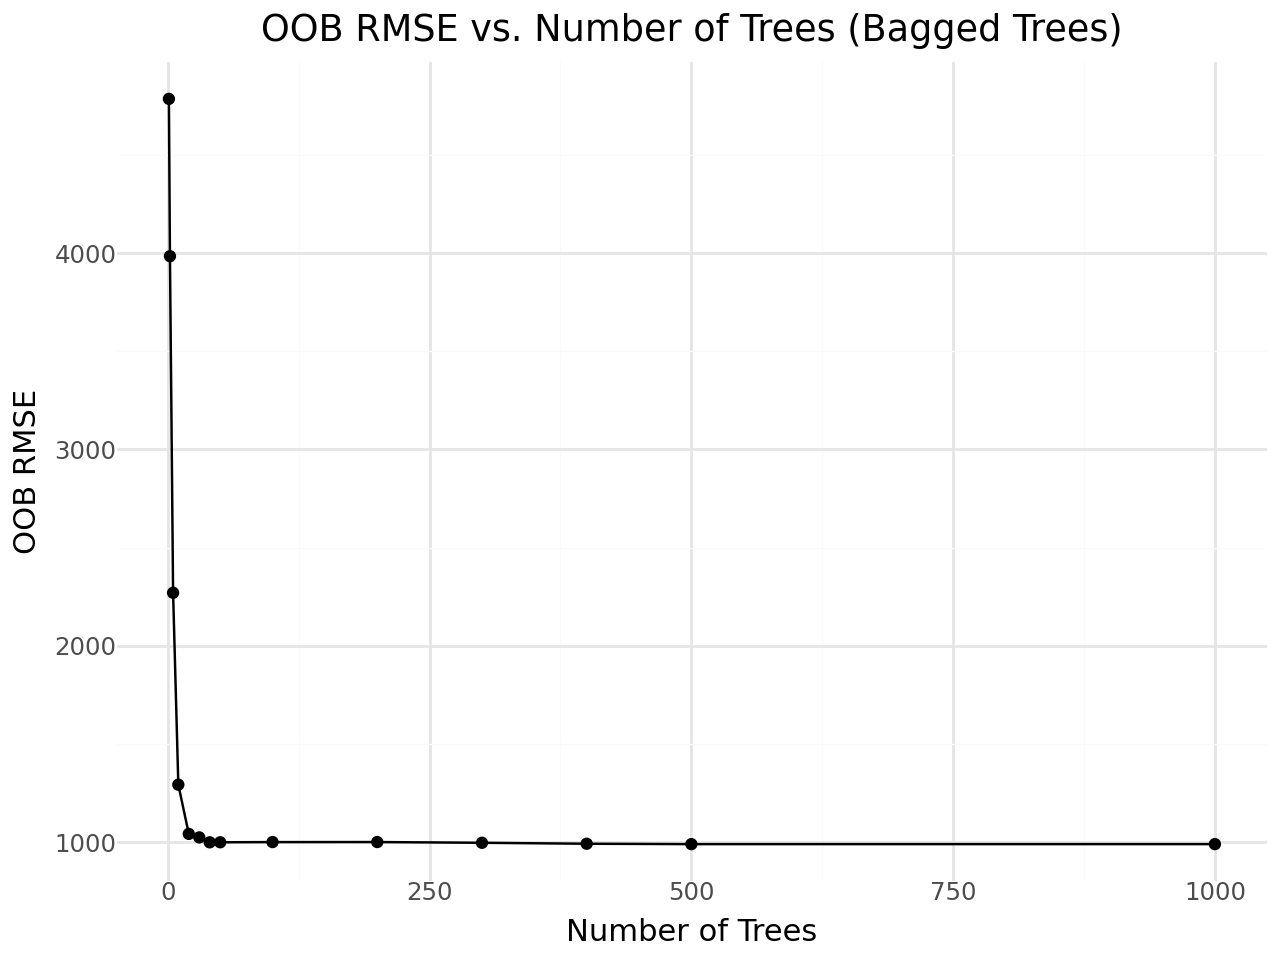

In [19]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#X_train and y_train are already defined from your sampling of 2000 observations.
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

#Since the diamonds dataset has categorical variables, create dummy variables.
X_train_dummies = pd.get_dummies(X_train, drop_first=True)

#Define the list of tree counts to evaluate.
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

#For each number of trees, fit a bagged-tree model using a random forest with all features at each split.
results = []
for n_trees in tree_counts:
    rf = RandomForestRegressor(random_state = 42, n_estimators = n_trees, oob_score = True, bootstrap = True, max_features = X_train_dummies.shape[1] )
   
    # Fit the model using the training data; flatten y_train to a 1D array.
    rf.fit(X_train_dummies, y_train.values.ravel())
    
    # Get the out-of-bag predictions and compute the RMSE.
    oob_pred = rf.oob_prediction_
    rmse =  np.sqrt(mean_squared_error(y_train, oob_pred))
    results.append({'n_trees': n_trees, 'oob_rmse': rmse})

# Convert results to a DataFrame for plotting.
results_df = pd.DataFrame(results)
print(results_df)

# Plot OOB RMSE vs. Number of Trees using plotnine.
plot = (ggplot(results_df, aes(x='n_trees', y='oob_rmse')) +
        geom_line() +
        geom_point() +
        labs(title='OOB RMSE vs. Number of Trees (Bagged Trees)', x='Number of Trees', y='OOB RMSE') +
        theme_minimal()
       )
plot

Note: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates ... This warning means that for some of the models (especially those with very few trees), there weren't enough out‐of‐bag (OOB) predictions available to compute a reliable OOB score. In other words, when the number of trees is very low, some training samples might not be left out of the bootstrap samples often enough, which leads to unstable or missing OOB estimates. As you increase the number of trees, the OOB score becomes more reliable because each sample has more opportunities to be left out during training.


These results suggest that the ensemble's performance improves dramatically as you add more trees, especially when moving from 1 or 2 trees to 10 trees. With just one tree, the OOB RMSE is very high (~4785), indicating that a single model is not reliable. As you increase the number of trees, the OOB RMSE drops sharply (to ~1293 with 10 trees, then ~1042 with 20 trees), meaning that the bagging process is stabilizing the predictions.

Beyond about 30–40 trees, the RMSE levels off around 990–1000. Increasing the number of trees from 40 up to 1000 only yields marginal improvements (with the RMSE decreasing from around 999 to about 989). This flattening indicates that the ensemble has reached a point where adding more trees does not significantly improve predictive performance—the model's variance has been largely reduced, and further increases in tree count yield diminishing returns.

In summary, using an ensemble of trees (bagged trees) substantially improves performance compared to a single tree, but there is a point of diminishing returns, as evidenced by the nearly constant OOB RMSE after approximately 40 trees.

Find the bootstrap s_e for a RF model using 1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000 trees. If you are using the `randomForest` package, you can calculate oob residuals via `e_oob = y_train - rf_mod$predicted`. Plot.

C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. Thi

    n_trees  bootstrap_se
0         1   4784.925768
1         2   3983.708489
2         5   2269.789670
3        10   1292.607196
4        20   1041.933474
5        30   1024.159591
6        40    999.051066
7        50    999.294139
8       100   1000.278084
9       200   1000.476791
10      300    996.671656
11      400    991.839314
12      500    989.800238
13     1000    989.879858


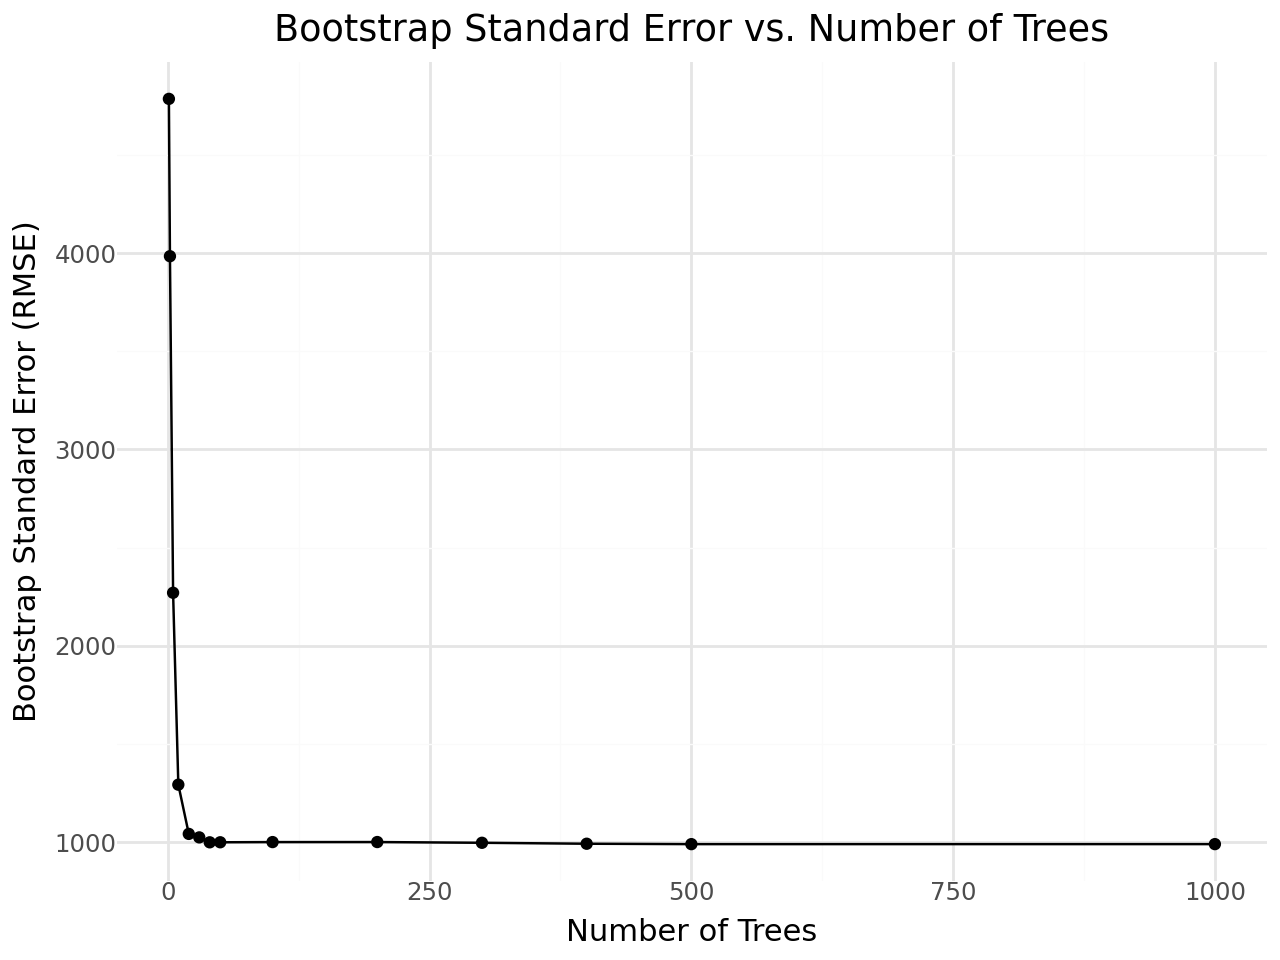

In [24]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from sklearn.ensemble import RandomForestRegressor


X_train_dummies = pd.get_dummies(X_train, drop_first=True)

# List of tree counts to evaluate
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

results = []
for n_trees in tree_counts:
    #Create a RandomForestRegressor that acts as a bagged tree model. Setting max_features equal to the number of predictors makes it a bagging model.
    rf = RandomForestRegressor(random_state = 42, n_estimators = n_trees, oob_score = True, bootstrap = True, max_features = X_train_dummies.shape[1])
    
    #Fit the model
    rf.fit(X_train_dummies, y_train.values.ravel())
    
    #Compute out-of-bag predictions and residuals: e_oob = y_train - oob_prediction
    oob_pred = rf.oob_prediction_
    e_oob = y_train.values.ravel() - oob_pred
    
    #Calculate the bootstrap standard error as the RMSE of the OOB residuals.
    bootstrap_se = np.sqrt(np.mean(e_oob ** 2))
    
    results.append({'n_trees': n_trees, 'bootstrap_se': bootstrap_se})

#Convert results to a DataFrame for plotting.
results_df = pd.DataFrame(results)
print(results_df)

#Plot bootstrap standard error vs. number of trees using plotnine.
plot = (
    ggplot(results_df, aes(x='n_trees', y='bootstrap_se')) +
    geom_line() +
    geom_point() +
    labs(title='Bootstrap Standard Error vs. Number of Trees', x='Number of Trees', y='Bootstrap Standard Error (RMSE)') +
    theme_minimal()
    )
plot

What is the percentage gain / loss in performance of the RF model vs bagged trees model for each number of trees? Gains are negative (as in lower oos s_e).

C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. Thi

    n_trees  bagged_oob_rmse  rf_oob_rmse  pct_gain
0         1      4784.925768  4806.793982  0.457023
1         2      3983.708489  3978.532041 -0.129940
2         5      2269.789670  2309.175254  1.735209
3        10      1292.607196  1364.369507  5.551749
4        20      1041.933474  1117.126205  7.216654
5        30      1024.159591  1069.785094  4.454921
6        40       999.051066  1041.462695  4.245191
7        50       999.294139  1022.628807  2.335115
8       100      1000.278084  1014.269479  1.398751
9       200      1000.476791  1022.286409  2.179922
10      300       996.671656  1024.495569  2.791683
11      400       991.839314  1018.566470  2.694706
12      500       989.800238  1019.038732  2.953979
13     1000       989.879858  1016.019520  2.640690


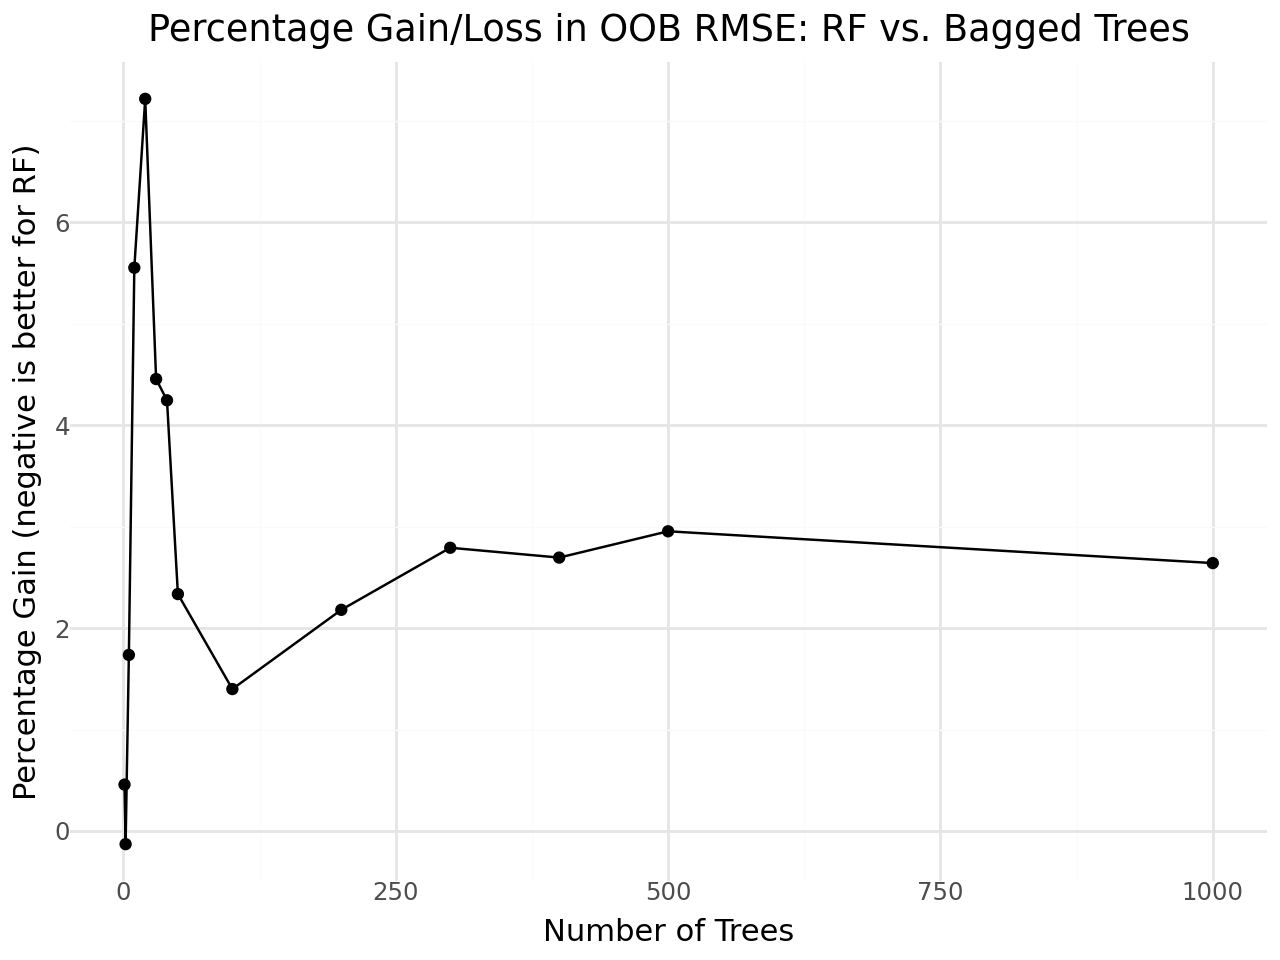

In [25]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Convert categorical predictors to dummy variables:
X_train_dummies = pd.get_dummies(X_train, drop_first=True)

# List of tree counts to evaluate.
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

results = []

for n_trees in tree_counts:
    # Bagged trees model: use all predictors at each split.
    bagged = RandomForestRegressor(
        n_estimators=n_trees,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        max_features=X_train_dummies.shape[1]  # all predictors (bagging)
    )
    bagged.fit(X_train_dummies, y_train.values.ravel())
    bagged_oob_pred = bagged.oob_prediction_
    bagged_rmse = np.sqrt(mean_squared_error(y_train, bagged_oob_pred))
    
    # Random Forest model: use a random subset ("sqrt") of predictors at each split.
    rf = RandomForestRegressor(
        n_estimators=n_trees,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        max_features="sqrt"  # default for classification; for regression this induces randomness
    )
    rf.fit(X_train_dummies, y_train.values.ravel())
    rf_oob_pred = rf.oob_prediction_
    rf_rmse = np.sqrt(mean_squared_error(y_train, rf_oob_pred))
    
    # Calculate percentage gain/loss in performance.
    # Percentage gain is computed as:
    #    (rf_rmse - bagged_rmse) / bagged_rmse * 100
    # So if rf_rmse is lower (better) than bagged_rmse, the gain will be negative.
    pct_gain = (rf_rmse - bagged_rmse) / bagged_rmse * 100
    
    results.append({
        'n_trees': n_trees,
        'bagged_oob_rmse': bagged_rmse,
        'rf_oob_rmse': rf_rmse,
        'pct_gain': pct_gain
    })

# Convert the results to a DataFrame.
results_df = pd.DataFrame(results)
print(results_df)

# Plot percentage gain/loss vs. number of trees using plotnine.
plot = (
    ggplot(results_df, aes(x='n_trees', y='pct_gain')) +
    geom_line() +
    geom_point() +
    labs(
        title='Percentage Gain/Loss in OOB RMSE: RF vs. Bagged Trees',
        x='Number of Trees',
        y='Percentage Gain (negative is better for RF)'
    ) +
    theme_minimal()
)
plot

Why was this the result?

Your results indicate that for nearly every tree count, the RF model (which selects a random subset of predictors at each split) has a slightly higher OOB RMSE than the bagged trees model (which uses all predictors at every split). In your table, a positive pct_gain means that the RF model's error is higher relative to the bagged trees model (i.e. RF is performing worse), except for the case with 2 trees where RF is very slightly better.

One interpretation is that in this particular dataset, all predictors appear to be quite informative. When you allow each tree in the ensemble to use all predictors (bagging), the trees can fully exploit the available information, which leads to lower prediction error. In contrast, by forcing each tree to only consider a subset of predictors (as in the RF model), you might be leaving out some of the valuable signals that improve prediction, hence the higher OOB RMSE.

Additionally, the differences are relatively small (generally a few percent), suggesting that while RF’s random feature selection can reduce correlation among trees and help prevent overfitting in some contexts, here it introduces a slight loss in performance compared to using all predictors. The performance gain (or rather, loss) from RF versus bagging depends on the underlying data structure, and in this case, the diamonds data seem to favor the bagged approach.


Note: In some datasets, the RF model—with its random subset of predictors at each split—can outperform bagged trees. The key difference is that RF's random feature selection can reduce the correlation among trees and help prevent overfitting, especially when predictors are noisy or highly correlated. In such cases, the diversity among the trees helps the ensemble generalize better, leading to improved performance. However, if most or all predictors are very informative and not redundant, bagging (which uses all predictors) might capture the full signal more effectively, as you observed in your results.

Plot oob s_e by number of trees for both RF and bagged trees by creating a long data frame from the two results.

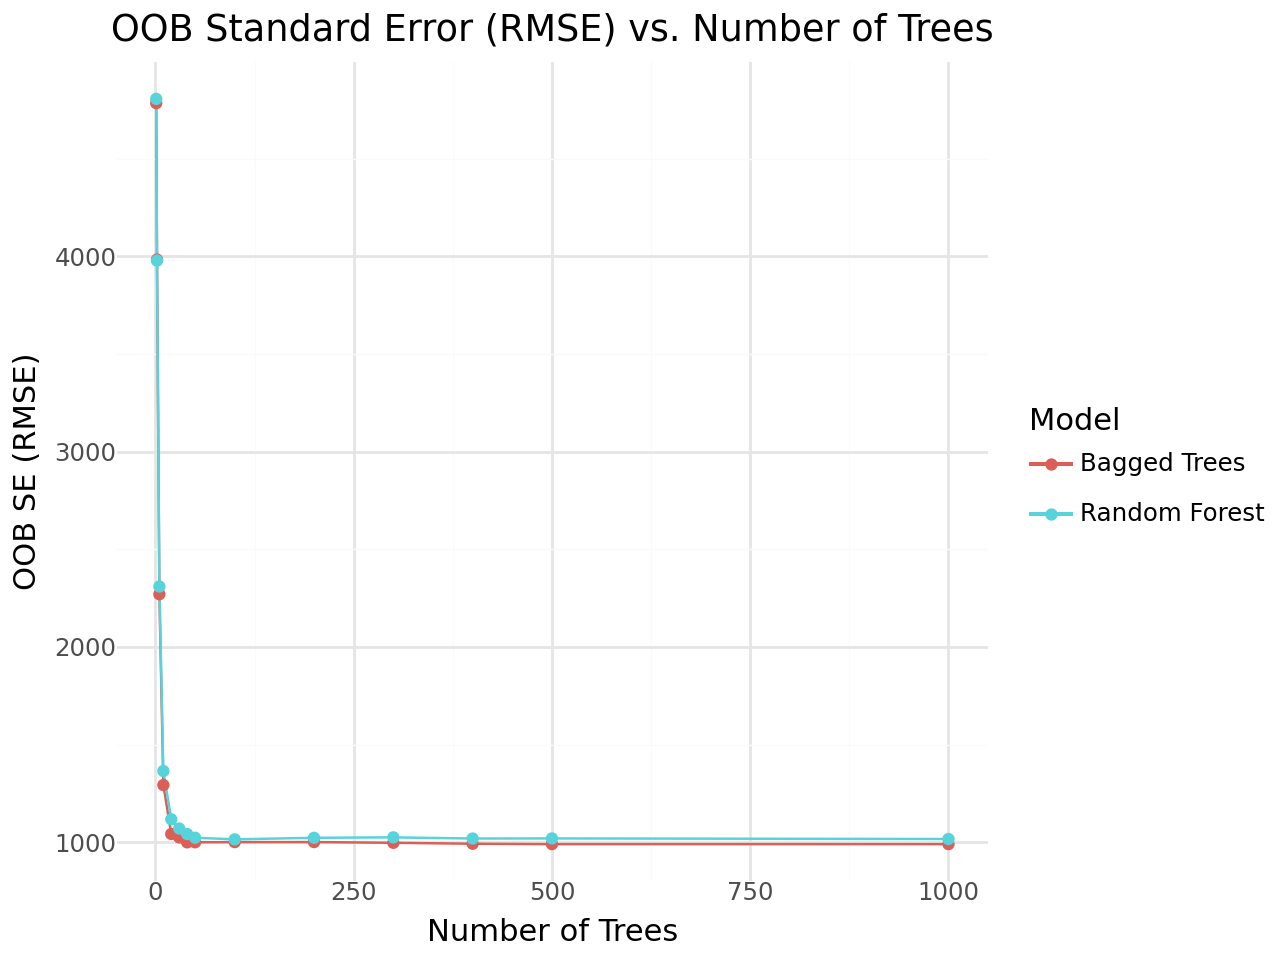

In [26]:

import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal



# Convert the wide format results_df to long format
results_long = pd.melt(results_df, 
                       id_vars=["n_trees"], 
                       value_vars=["bagged_oob_rmse", "rf_oob_rmse"],
                       var_name="model", 
                       value_name="oob_rmse")

# Optionally, modify the model names to be more readable
results_long['model'] = results_long['model'].map({
    'bagged_oob_rmse': 'Bagged Trees',
    'rf_oob_rmse': 'Random Forest'
})

# Plot OOB SE (RMSE) vs. number of trees, colored by model
plot = (
    ggplot(results_long, aes(x='n_trees', y='oob_rmse', color='model')) +
    geom_line() +
    geom_point() +
    labs(
        title='OOB Standard Error (RMSE) vs. Number of Trees',
        x='Number of Trees',
        y='OOB SE (RMSE)',
        color='Model'
    ) +
    theme_minimal()
)
plot

Build RF models for 500 trees using different `mtry` values: 1, 2, ... the maximum. That maximum will be the number of features assuming that we do not binarize categorical features if you are using `randomForest`. Calculate oob s_e for all mtry values.

In [30]:
import pandas as pd
import numpy as np
from plotnine.data import diamonds
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

# Load the diamonds dataset
diamonds_df = diamonds.copy()

# Take a random sample of 2000 observations
sample_df = diamonds_df.sample(n=2000, random_state=42)
X_raw = sample_df.drop(columns=['price']).copy()
y_raw = sample_df['price'].copy()

# Convert categorical features to ordinal codes (no one-hot encoding)
for col in X_raw.select_dtypes(include='category').columns:
    X_raw[col] = X_raw[col].cat.codes

# Determine the maximum mtry (number of predictors, since we didn’t dummy encode)
max_mtry = X_raw.shape[1]

# Fit RF models with 500 trees and varying mtry values
results = []
for mtry in range(1, max_mtry + 1):
    rf = RandomForestRegressor(
        n_estimators=500,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        max_features=mtry  # Equivalent to mtry
    )
    rf.fit(X_raw, y_raw)
    oob_pred = rf.oob_prediction_
    oob_rmse = np.sqrt(mean_squared_error(y_raw, oob_pred))
    results.append({'mtry': mtry, 'oob_rmse': oob_rmse})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)



   mtry    oob_rmse
0     1  943.860953
1     2  853.484998
2     3  807.333313
3     4  783.206822
4     5  772.427531
5     6  764.007558
6     7  755.649389
7     8  754.222814
8     9  752.500368
<ggplot: (640 x 480)>


Plot oob s_e by mtry.

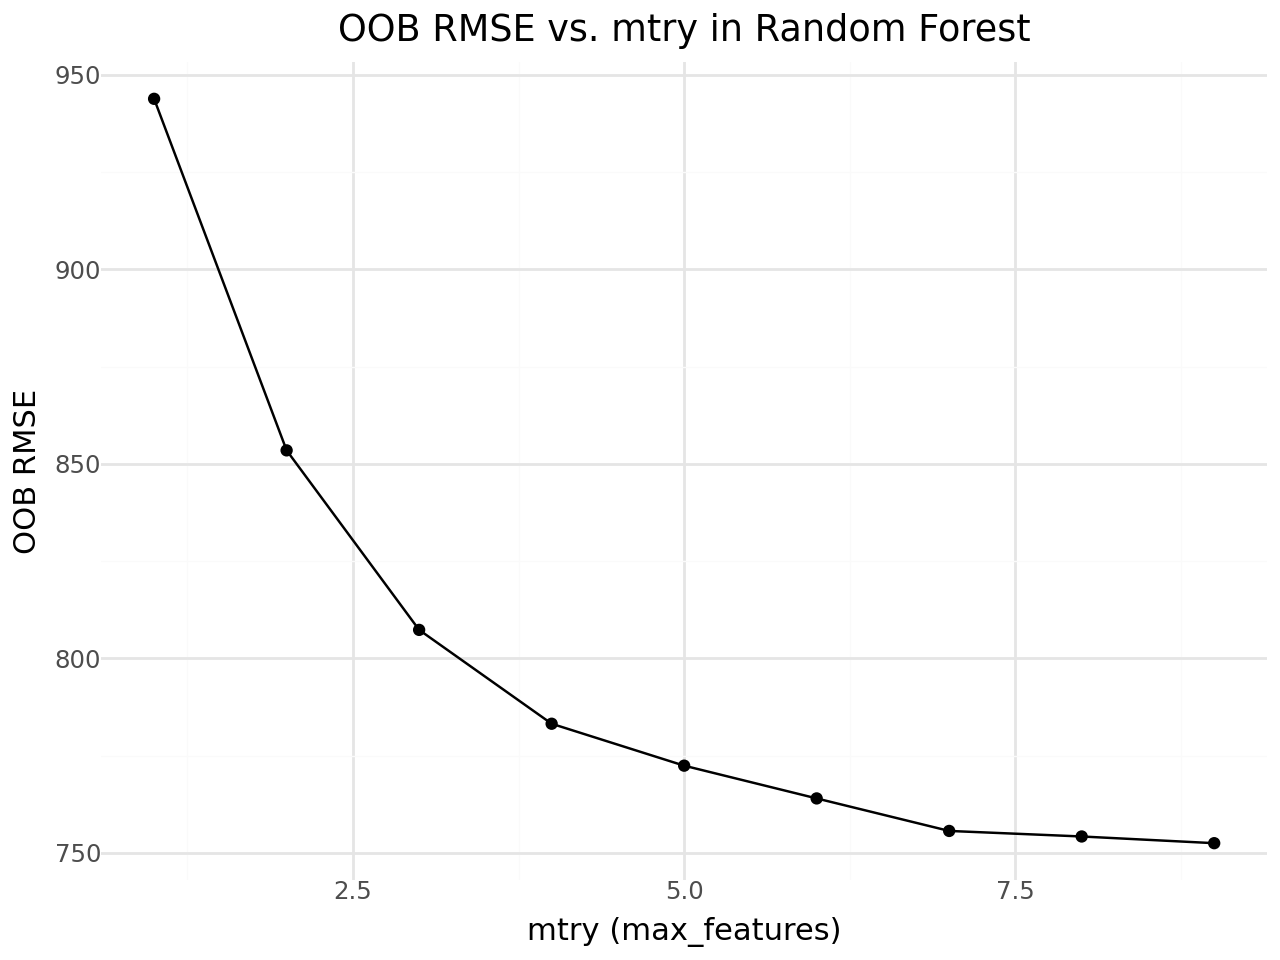

In [31]:
# Plot OOB RMSE vs. mtry
plot = (
    ggplot(results_df, aes(x='mtry', y='oob_rmse')) +
    geom_line() +
    geom_point() +
    labs(title='OOB RMSE vs. mtry in Random Forest',
         x='mtry (max_features)',
         y='OOB RMSE') +
    theme_minimal()
)
plot


Take a sample of n = 2000 observations from the adult data and name it `adult_sample`. Then impute missing values using missForest.

In [37]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Set random seed for reproducibility
np.random.seed(1)

# ✅ Load the dataset using the correct absolute path (raw string format)
adult = pd.read_csv(r"C:\Users\ilana brunner\Downloads\lab10\adult_data (1).csv")

# ✅ Take a random sample of 2000 observations
adult_sample = adult.sample(n=2000, random_state=1).reset_index(drop=True)

# ✅ Display missing value counts
missing_counts = adult_sample.isna().sum()
print("Missing values before imputation:\n", missing_counts)

# ✅ Identify categorical and numeric columns
categorical_cols = adult_sample.select_dtypes(include=['object', 'category']).columns
numeric_cols = adult_sample.select_dtypes(include=['number']).columns

# ✅ Encode categorical variables with integer codes
adult_encoded = adult_sample.copy()
for col in categorical_cols:
    adult_encoded[col] = adult_encoded[col].astype('category').cat.codes
    # Missing values will be encoded as -1

# ✅ Use RandomForestRegressor to impute missing values
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=1),
    max_iter=10,
    random_state=1
)

# Impute and convert to DataFrame
adult_imputed_array = imputer.fit_transform(adult_encoded)
adult_imputed = pd.DataFrame(adult_imputed_array, columns=adult_encoded.columns)

# ✅ Final check for missing values
print("\nMissing values after imputation:\n", adult_imputed.isna().sum())



Missing values before imputation:
 age                 0
workclass         125
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        125
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country     30
income              0
dtype: int64

Missing values after imputation:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [39]:
import pandas as pd

# Assume adult_sample is already defined, e.g., from:
# adult_sample = pd.read_csv(...) or from previous sampling

# List of categorical columns to encode
categorical_columns = [
    'workclass', 'education', 'marital_status', 'occupation',
    'relationship', 'race', 'sex', 'native_country', 'income'
]

# List of the continuous columns
continuous_columns = [
    'age', 'fnlwgt', 'education_num', 'capital_gain',
    'capital_loss', 'hours_per_week'
]

# ✅ Convert continuous columns to float
adult_sample[continuous_columns] = adult_sample[continuous_columns].astype(float)

# ✅ Verify the conversion
print("Data types for continuous columns:")
print(adult_sample[continuous_columns].dtypes)

# ✅ Create a copy of the data for encoding
adult_sample_encoded = adult_sample.copy()

# ✅ Dictionary to store mappings for each categorical column
mappings = {}

# ✅ Loop through each categorical column
for col in categorical_columns:
    # Convert the column to a pandas Categorical type
    adult_sample_encoded[col] = adult_sample_encoded[col].astype('category')
    
    # Save the mapping: integer codes to original category names
    mappings[col] = dict(enumerate(adult_sample_encoded[col].cat.categories))
    
    # Replace the column with its numeric codes
    adult_sample_encoded[col] = adult_sample_encoded[col].cat.codes

# ✅ Print mappings
print("\nMappings for categorical columns:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")


Data types for continuous columns:
age               float64
fnlwgt            float64
education_num     float64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
dtype: object

Mappings for categorical columns:
workclass: {0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
education: {0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
marital_status: {0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
occupation: {0: 'Adm-clerical', 1: 'Craft-repair', 2: 'Exec-managerial', 3: 'Farming-fishing', 4: 'Handlers-cleaners', 5: 'Machine-op-inspct', 6: 'Other-service', 7: 'Priv-house-serv', 8: 'Prof-specialty', 9: 'Protec

In [42]:
# Impute missing values
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=1), random_state=1)
adult_sample_imputed = pd.DataFrame(imputer.fit_transform(adult_sample_encoded),
                                    columns=adult_sample_encoded.columns)

# Round imputed categorical columns back to integers
for col in categorical_columns:
    adult_sample_imputed[col] = adult_sample_imputed[col].round().astype(int)

# Separate predictors and target
X_train = adult_sample_imputed.drop(columns=['income'])
y_train = adult_sample_imputed['income']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (2000, 14)
y_train shape: (2000,)


Using the adult_train data, find the bootstrap misclassification error for a bagged-tree model using 1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000 trees. Plot.

C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. Thi

    n_trees  misclassification_error
0         1                   0.2180
1         2                   0.2185
2         5                   0.2095
3        10                   0.1800
4        20                   0.1800
5        30                   0.1830
6        40                   0.1730
7        50                   0.1715
8       100                   0.1745
9       200                   0.1690
10      300                   0.1710
11      400                   0.1725
12      500                   0.1730
13     1000                   0.1710


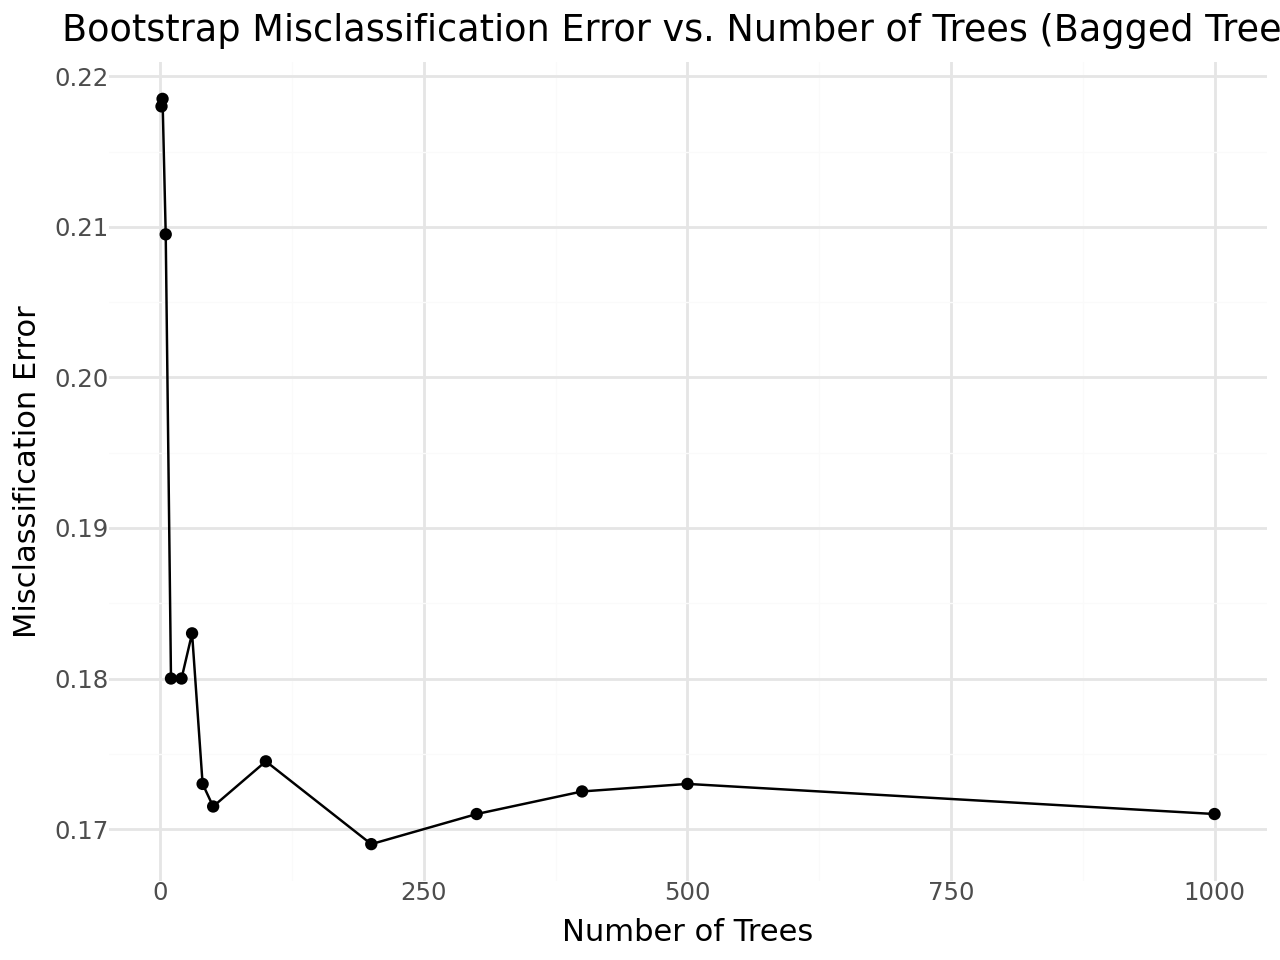

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

# For bagging, set max_features to the total number of predictors
max_features = X_train.shape[1]

# Define the list of tree counts to evaluate
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

results = []
for n_trees in tree_counts:
    # Create a bagged tree classifier: using all features at each split
    clf = RandomForestClassifier(
        n_estimators=n_trees,
        max_features=max_features,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    clf.fit(X_train, y_train)

    # The oob_score_ attribute gives OOB accuracy
    oob_accuracy = clf.oob_score_
    misclassification_error = 1 - oob_accuracy  # bootstrap misclassification error

    results.append({
        'n_trees': n_trees,
        'misclassification_error': misclassification_error
    })

bagged_results_df = pd.DataFrame(results)
print(bagged_results_df)

# Plot the OOB misclassification error versus number of trees
plot = (
    ggplot(bagged_results_df, aes(x='n_trees', y='misclassification_error')) +
    geom_line() +
    geom_point() +
    labs(
        title='Bootstrap Misclassification Error vs. Number of Trees (Bagged Trees)',
        x='Number of Trees',
        y='Misclassification Error'
    ) +
    theme_minimal()
)
plot


Using the adult_train data, find the bootstrap misclassification error for an RF model using 1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000 trees.

In [44]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Separate predictors and target
X_train = adult_sample_imputed.drop(columns=['income'])
y_train = adult_sample_imputed['income']

# Define the list of tree counts to evaluate
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

results = []

for n_trees in tree_counts:
    # Build a RandomForestClassifier using the default max_features (sqrt for classification)
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    
    # OOB accuracy
    oob_accuracy = rf.oob_score_
    misclassification_error = 1 - oob_accuracy  # Bootstrap misclassification error
    
    results.append({'n_trees': n_trees, 'rf_misclassification_error': misclassification_error})

# Convert the results to a DataFrame and print
rf_results_df = pd.DataFrame(results)
print(rf_results_df)


C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. Thi

    n_trees  rf_misclassification_error
0         1                      0.2260
1         2                      0.2270
2         5                      0.2165
3        10                      0.1990
4        20                      0.1815
5        30                      0.1815
6        40                      0.1680
7        50                      0.1680
8       100                      0.1695
9       200                      0.1680
10      300                      0.1700
11      400                      0.1705
12      500                      0.1700
13     1000                      0.1720


What is the percentage gain / loss in performance of the RF model vs bagged trees model?

In [49]:
# Merge the two dataframes (bagged_results_df and rf_results_df) on 'n_trees'
merged_results = bagged_results_df.merge(rf_results_df, on='n_trees', suffixes=('_bagged', '_rf'))

# Print the column names after merging
print("Columns after merging:", merged_results.columns)

# Rename the 'misclassification_error' columns to match the desired column names
merged_results.rename(columns={
    'misclassification_error_x': 'bagged_misclassification_error',  # bagged misclassification error
    'misclassification_error_y': 'rf_misclassification_error'      # random forest misclassification error
}, inplace=True)

# Now the merged dataframe should have the correct column names. Calculate the percentage gain/loss in performance
merged_results['pct_gain'] = ((merged_results['rf_misclassification_error'] - merged_results['bagged_misclassification_error']) / merged_results['bagged_misclassification_error']) * 100

# Display the resulting dataframe
print(merged_results)


Columns after merging: Index(['n_trees', 'misclassification_error', 'rf_misclassification_error'], dtype='object')


KeyError: 'bagged_misclassification_error'

Note: We divide by the bagged tree error because that error serves as our baseline for comparison. In this calculation, we're expressing the change in performance of the RF model relative to the bagged trees model. By using the bagged error as the denominator, the percentage gain (or loss) tells you how much the RF model's performance deviates from the baseline performance of the bagged trees. 

If we divided by the RF error instead, it would change the interpretation. The current approach makes it clear that any improvement (or worsening) is measured as a percentage of the bagged trees' error. This is particularly useful if you consider the bagged trees model as the standard or reference model in your analysis.

Build RF models on adult_train for 500 trees using different `mtry` values: 1, 2, ... the maximum (see above as maximum is defined by the specific RF algorithm implementation). 

    mtry  oob_error
0      1     0.1665
1      2     0.1690
2      3     0.1700
3      4     0.1650
4      5     0.1705
5      6     0.1740
6      7     0.1705
7      8     0.1745
8      9     0.1655
9     10     0.1720
10    11     0.1705
11    12     0.1750
12    13     0.1710
13    14     0.1730


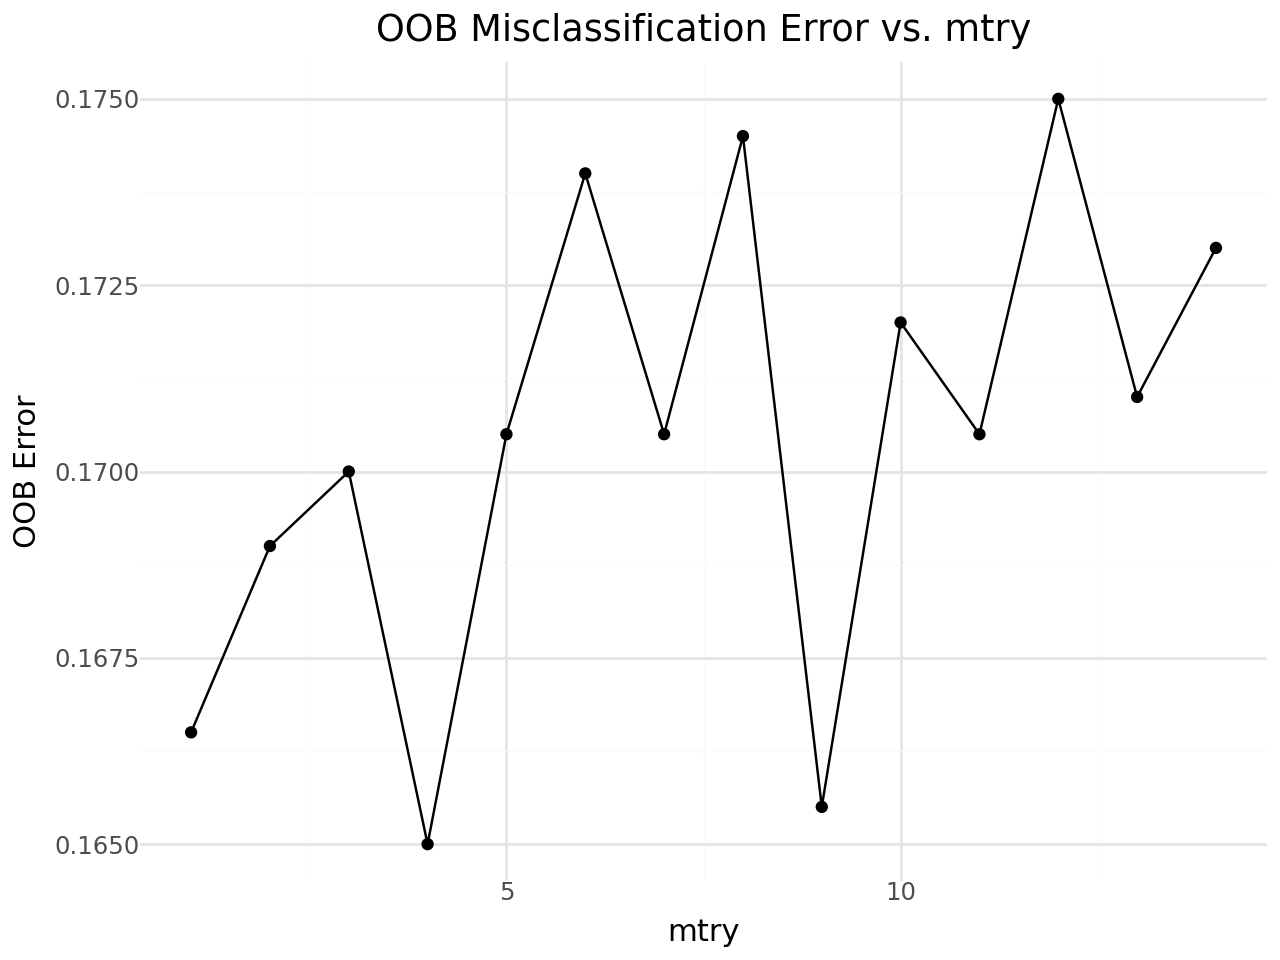

In [50]:
from sklearn.ensemble import RandomForestClassifier
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
import pandas as pd

# Define X_train and y_train (assuming you have already done this part)
X_train = adult_sample_imputed.drop(columns=['income'])
y_train = adult_sample_imputed['income']

# The maximum mtry value is the total number of features.
max_mtry = X_train.shape[1]

# Store results
results = []

# Loop through different mtry values (1 to max_mtry)
for mtry in range(1, max_mtry + 1):
    # Create the RandomForestClassifier with 500 trees and varying max_features (mtry)
    rf = RandomForestClassifier(n_estimators=500, max_features=mtry, oob_score=True, random_state=42)
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Compute the OOB misclassification error (1 - OOB accuracy)
    oob_error = 1 - rf.oob_score_
    
    # Append the results
    results.append({'mtry': mtry, 'oob_error': oob_error})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot the OOB misclassification error vs. mtry values using plotnine
plot = (ggplot(results_df, aes(x='mtry', y='oob_error')) +
        geom_line() +
        geom_point() +
        labs(title='OOB Misclassification Error vs. mtry', x='mtry', y='OOB Error') +
        theme_minimal())

# Display the plot# Plot the OOB misclassification error vs. mtry using plotnine
plot = (ggplot(results_df, aes(x='mtry', y='oob_error')) +
        geom_line() +
        geom_point() +
        labs(title='OOB Misclassification Error vs. mtry (500 Trees)', 
             x='mtry (Number of Features Considered per Split)', 
             y='OOB Misclassification Error') +
        theme_minimal()
        )

# Display the plot
plot

plot


Plot bootstrap misclassification error by `mtry`.

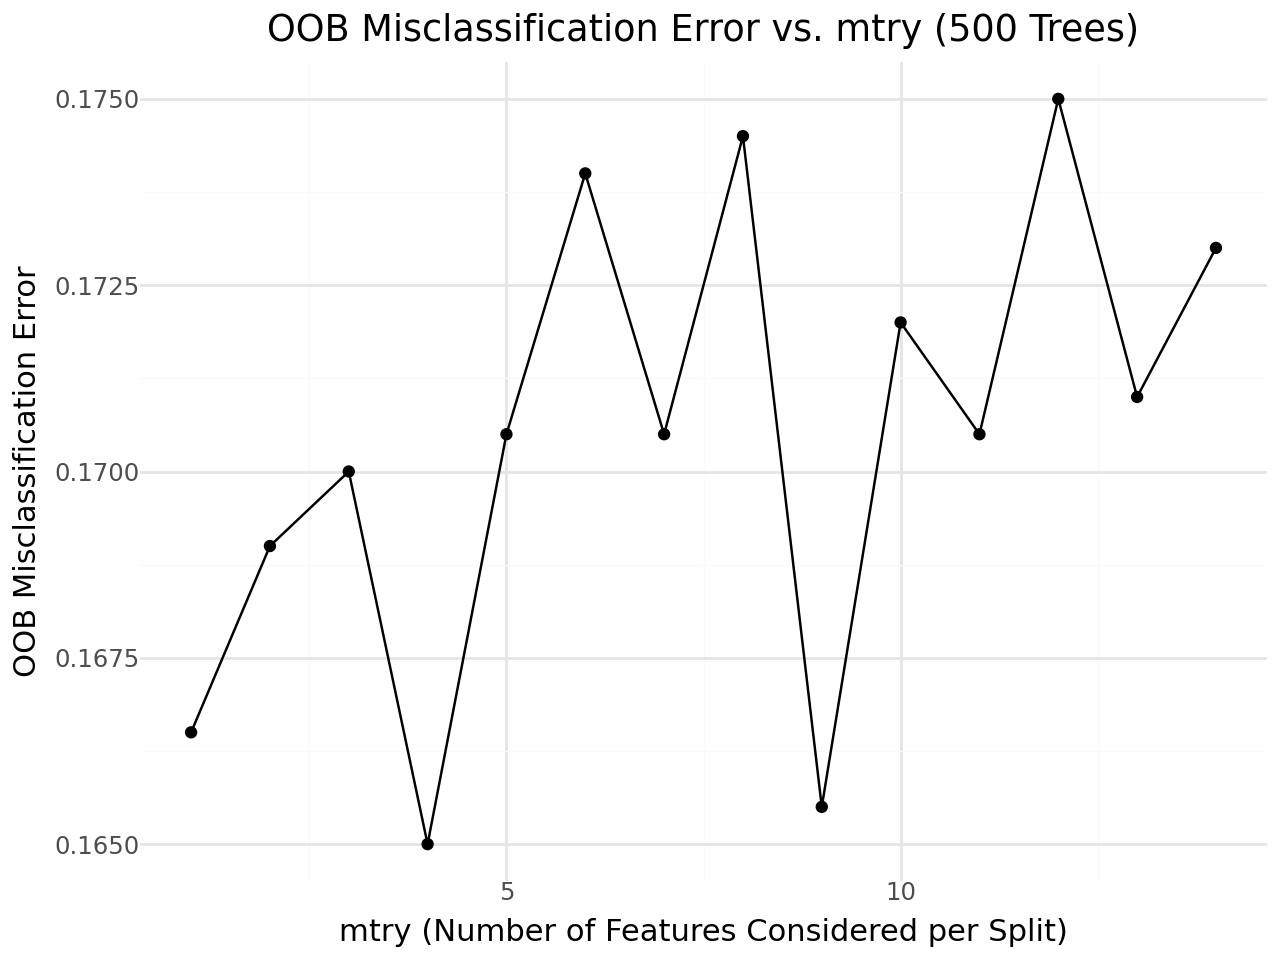

In [51]:
# Plot the OOB misclassification error vs. mtry using plotnine
plot = (ggplot(results_df, aes(x='mtry', y='oob_error')) +
        geom_line() +
        geom_point() +
        labs(title='OOB Misclassification Error vs. mtry (500 Trees)', 
             x='mtry (Number of Features Considered per Split)', 
             y='OOB Misclassification Error') +
        theme_minimal()
        )

# Display the plot
plot


Is `mtry` an important hyperparameter to optimize when using the RF algorithm? Explain

Yes, `mtry` is an important hyperparameter to optimize when using the Random Forest (RF) algorithm because it controls the number of features randomly selected at each split in the decision trees.

A well-chosen `mtry` value helps balance two key trade-offs:

1. **Tree diversity vs. tree strength:**  
   A smaller `mtry` increases the diversity between trees in the forest, which can reduce overfitting by lowering the correlation among trees. However, if it's too small, each individual tree becomes weak because it doesn’t have enough relevant features to split on.  
   A larger `mtry` allows each tree to be stronger, but it also increases the similarity between trees, which can reduce the benefit of averaging in the ensemble.

2. **Model performance:**  
   The right `mtry` value can lead to better generalization and lower out-of-bag (OOB) or test error. The default in scikit-learn is `sqrt(p)` for classification and `p/3` for regression, but these defaults may not be optimal for all datasets.

Therefore, tuning `mtry`—just like other hyperparameters such as the number of trees or maximum depth—can help you achieve better predictive performance from a Random Forest model.

Identify the best model among all values of `mtry`. Fit this RF model. Then report the following oob error metrics: misclassification error, precision, recall, F1, FDR, FOR and compute a confusion matrix.

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


#Identify the best mtry value based on minimum OOB misclassification error.
best_mtry = results_df.loc[results_df['oob_error'].idxmin(), 'mtry']
print("Best mtry value:", best_mtry)

#Fit the best RF model using 500 trees with the best mtry.
best_rf = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,
    bootstrap=True,
    random_state=42,
    max_features=best_mtry
)
best_rf.fit(X_train, y_train)

#Get the OOB decision function (probabilities). For binary classification, oob_decision_function_ returns an array with 2 columns.
#We use the probability for the positive class (column index 1) and threshold at 0.5.
oob_proba = best_rf.oob_decision_function_
oob_pred = (oob_proba[:, 1] >= 0.5).astype(int)

#Calculate metrics.
accuracy = accuracy_score(y_train, oob_pred)
misclassification_error = 1 - accuracy
precision = precision_score(y_train, oob_pred, pos_label=1)
recall = recall_score(y_train, oob_pred, pos_label=1)
f1 = f1_score(y_train, oob_pred, pos_label=1)

#Compute the confusion matrix.
cm = confusion_matrix(y_train, oob_pred)
tn, fp, fn, tp = cm.ravel()

#Calculate FDR (False Discovery Rate) and FOR (False Omission Rate)
FDR = fp / (fp + tp) if (fp + tp) > 0 else 0
FOR = fn / (fn + tn) if (fn + tn) > 0 else 0

#Create a DataFrame summarizing the metrics.
metrics_df = pd.DataFrame({'Metric': ['Misclassification Error', 'Precision', 'Recall', 'F1 Score', 'FDR', 'FOR'],
    'Value': [misclassification_error, precision, recall, f1, FDR, FOR]
})

print("OOB Error Metrics for the best RF model (500 trees, mtry = {}):".format(best_mtry))
print(metrics_df)
print("\nConfusion Matrix:")
print(cm)

Best mtry value: 4
OOB Error Metrics for the best RF model (500 trees, mtry = 4):
                    Metric     Value
0  Misclassification Error  0.166000
1                Precision  0.675393
2                   Recall  0.553648
3                 F1 Score  0.608491
4                      FDR  0.324607
5                      FOR  0.128554

Confusion Matrix:
[[1410  124]
 [ 208  258]]


Is this a good model? (yes/no and explain).

well True Negatives (TN) = 1410

False Positives (FP) = 124

False Negatives (FN) = 208

True Positives (TP) = 258

No, the model is not yet perfect. While it performs well in some areas (precision), the recall and F1 score could be improved, meaning that the model is not identifying all the relevant positive cases. 

There are probability asymmetric costs to the two types of errors. Assign two costs below and calculate oob total cost.

In [53]:
# Assign cost values
fp_cost = 10  # Adjust based on your application
fn_cost = 100  # Adjust based on your application

# Using the previously computed confusion matrix components: tn, fp, fn, tp
tn = 1410  # True Negatives
fp = 124   # False Positives
fn = 208   # False Negatives
tp = 258   # True Positives

# Compute the total cost
total_cost = (fp * fp_cost) + (fn * fn_cost)

print("OOB Total Cost:", total_cost)


OOB Total Cost: 22040


# Asymmetric Cost Modeling, ROC and DET curves

Fit a logistic regression model to the adult_train missingness-imputed data.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Separate predictors (X) and target (y).
X_train = adult_sample_imputed.drop(columns=['income'])
y_train = adult_sample_imputed['income']

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standardize the predictors

# Fit a logistic regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Print model coefficients and intercept
print("Model coefficients:", logistic_model.coef_)
print("Model intercept:", logistic_model.intercept_)


Model coefficients: [[ 0.48743915 -0.04520349  0.13026893 -0.03549069  0.94248967 -0.36487254
   0.10227972 -0.27260295  0.0707016   0.34969047  2.55435528  0.35522027
   0.38107644  0.07237783]]
Model intercept: [-1.56361055]


Use the function from class to calculate all the error metrics (misclassification error, precision, recall, F1, FDR, FOR) for the values of the probability threshold being 0.001, 0.002, ..., 0.999 in a tibble (dplyr data frame).

In [55]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Get predicted probabilities for the positive class.
p_hat = logistic_model.predict_proba(X_train_scaled)[:, 1]

# Define thresholds from 0.001 to 0.999
thresholds = np.arange(0.001, 1, 0.001)

# Total number of samples (for misclassification error calculation)
n = len(y_train)

results = []
for thresh in thresholds:
    # Binary predictions based on threshold
    y_pred = (p_hat >= thresh).astype(int)
    
    # Compute confusion matrix: it returns an array [[TN, FP], [FN, TP]]
    cm = confusion_matrix(y_train, y_pred)
    
    # Handle the case if one of the classes is missing in predictions
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        # If only one class is present in y_pred, assign accordingly.
        if np.unique(y_pred).size == 1:
            if y_pred[0] == 0:
                tn = cm[0, 0]
                fp = 0
                fn = np.sum(y_train)  # All actual positives missed.
                tp = 0
            else:
                tn = 0
                fp = np.sum(y_train == 0)
                fn = 0
                tp = cm[0, 0]
    
    # Calculate metrics
    misclassification_error = (fp + fn) / n
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    FDR = fp / (tp + fp) if (tp + fp) > 0 else 0  # False Discovery Rate
    FOR = fn / (fn + tn) if (fn + tn) > 0 else 0  # False Omission Rate
    
    results.append({
        'p_hat_threshold': thresh,
        'misclassification_error': misclassification_error,
        'precision': precision,
        'recall': recall,
        'F1': f1,
        'FDR': FDR,
        'FOR': FOR,
        'FP': fp,
        'FN': fn
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the first few rows of the results
print(results_df.head())


   p_hat_threshold  misclassification_error  precision  recall        F1  \
0            0.001                   0.7665   0.233117     1.0  0.378093   
1            0.002                   0.7660   0.233233     1.0  0.378247   
2            0.003                   0.7605   0.234524     1.0  0.379943   
3            0.004                   0.7555   0.235711     1.0  0.381498   
4            0.005                   0.7505   0.236909     1.0  0.383066   

        FDR  FOR    FP  FN  
0  0.766883  0.0  1533   0  
1  0.766767  0.0  1532   0  
2  0.765476  0.0  1521   0  
3  0.764289  0.0  1511   0  
4  0.763091  0.0  1501   0  


Calculate the column `total_cost` and append it to this data frame via `mutate`.

In [56]:
# Define the cost per false positive and false negative
fp_cost = 10  # Example cost for a false positive
fn_cost = 20  # Example cost for a false negative

# Calculate the total cost for each threshold
results_df = results_df.assign(
    total_cost = (results_df['FP'] * fp_cost) + (results_df['FN'] * fn_cost)
)

# Display the first few rows of the final DataFrame
print(results_df.head())


   p_hat_threshold  misclassification_error  precision  recall        F1  \
0            0.001                   0.7665   0.233117     1.0  0.378093   
1            0.002                   0.7660   0.233233     1.0  0.378247   
2            0.003                   0.7605   0.234524     1.0  0.379943   
3            0.004                   0.7555   0.235711     1.0  0.381498   
4            0.005                   0.7505   0.236909     1.0  0.383066   

        FDR  FOR    FP  FN  total_cost  
0  0.766883  0.0  1533   0       15330  
1  0.766767  0.0  1532   0       15320  
2  0.765476  0.0  1521   0       15210  
3  0.764289  0.0  1511   0       15110  
4  0.763091  0.0  1501   0       15010  


Which is the lowest total cost? What is the "winning" probability threshold value providing that minimum total cost?

In [57]:
# Find the row with the minimum total cost
min_cost_row = results_df.loc[results_df['total_cost'].idxmin()]

# Extract the lowest total cost and the corresponding probability threshold
lowest_total_cost = min_cost_row['total_cost']
winning_threshold = min_cost_row['p_hat_threshold']

print("Lowest Total Cost:", lowest_total_cost)
print("Winning Probability Threshold:", winning_threshold)


Lowest Total Cost: 5040.0
Winning Probability Threshold: 0.299


Plot an ROC curve.

AUC: 0.8650390854508117


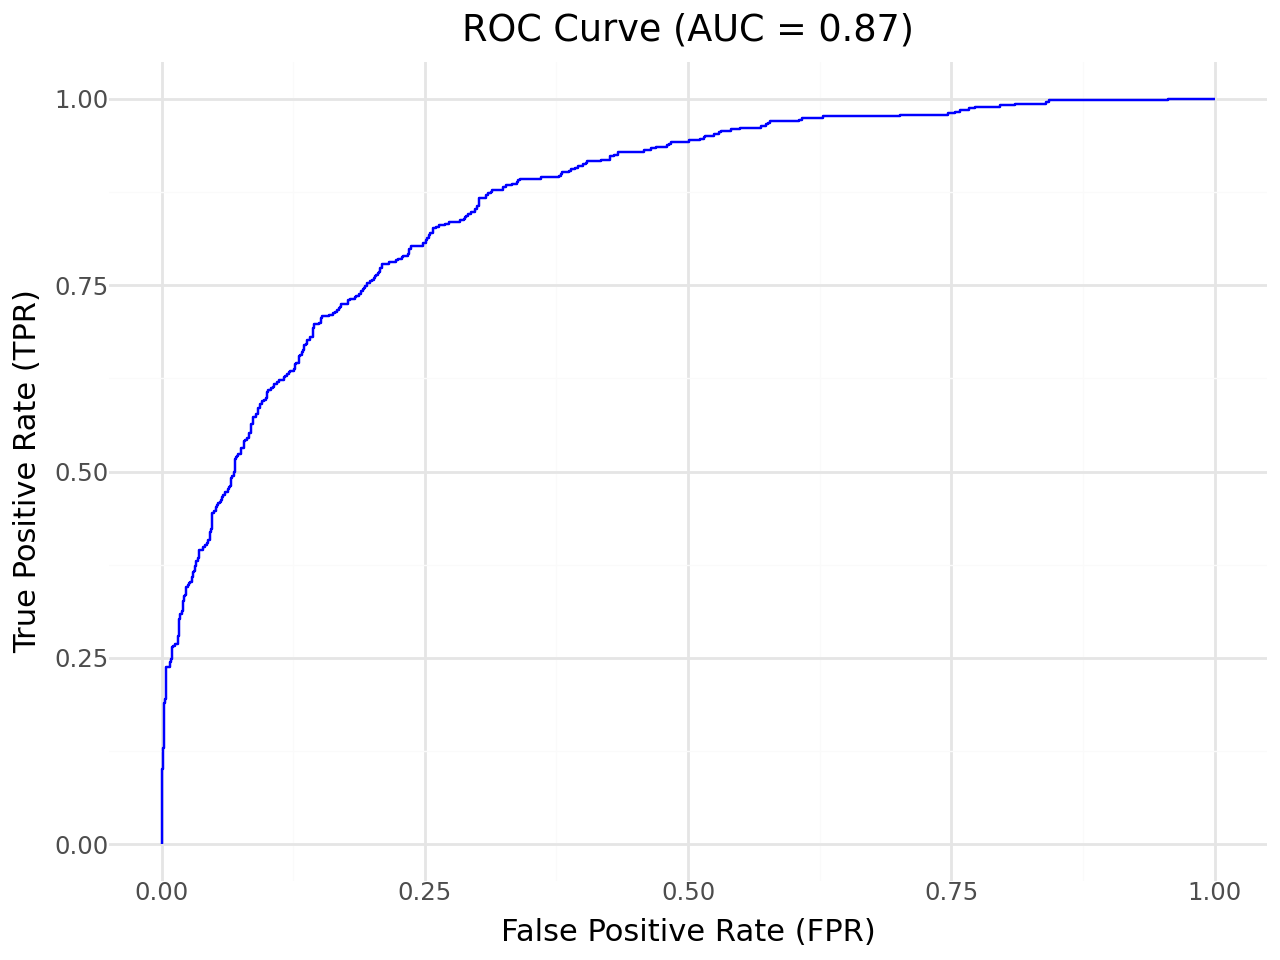

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_train, p_hat)
auc_value = roc_auc_score(y_train, p_hat)
print("AUC:", auc_value)

# Create a DataFrame to hold the ROC curve data
roc_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

# Plot the ROC curve using plotnine
roc_plot = (ggplot(roc_data, aes(x='False Positive Rate', y='True Positive Rate')) +
            geom_line(color='blue') +
            labs(title=f'ROC Curve (AUC = {auc_value:.2f})', x='False Positive Rate (FPR)', y='True Positive Rate (TPR)') +
            theme_minimal())

# Show the plot
roc_plot


Interpret the ROC curve

The ROC curve shows how well the model distinguishes between the two classes by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) for various probability thresholds. An AUC of 0.87 indicates that the model has a strong ability to separate the positive class from the negative class. Specifically:

- **Curve Shape:** The curve rises quickly toward the top‐left corner, meaning that at many threshold values, the model achieves a high TPR while keeping the FPR relatively low.  
- **AUC = 0.87:** Since a value of 0.5 would correspond to random guessing, 0.87 is considered good. It suggests that, on average, the model can correctly rank a positive instance higher than a negative instance 87% of the time.  

Overall, the model demonstrates solid discriminative power and should perform well in scenarios where correctly identifying positive cases is important, provided that the chosen threshold balances the desired trade‐off between false positives and false negatives.

Calculate AUC

In [59]:
from sklearn.metrics import roc_auc_score

# Compute the AUC score
auc_value = roc_auc_score(y_train, p_hat)

# Print the AUC value
print("AUC:", auc_value)


AUC: 0.8650390854508117


Interpret the AUC results

An AUC of approximately 0.865 indicates that the model has strong discriminatory power. In practical terms, it means that if you randomly select one positive case and one negative case, there is about an 86.5% chance that the model will assign a higher predicted probability to the positive case than to the negative one. This suggests the model is effective at distinguishing between the two classes, performing well above random chance (which would be 0.5).

Plot a DET curve.

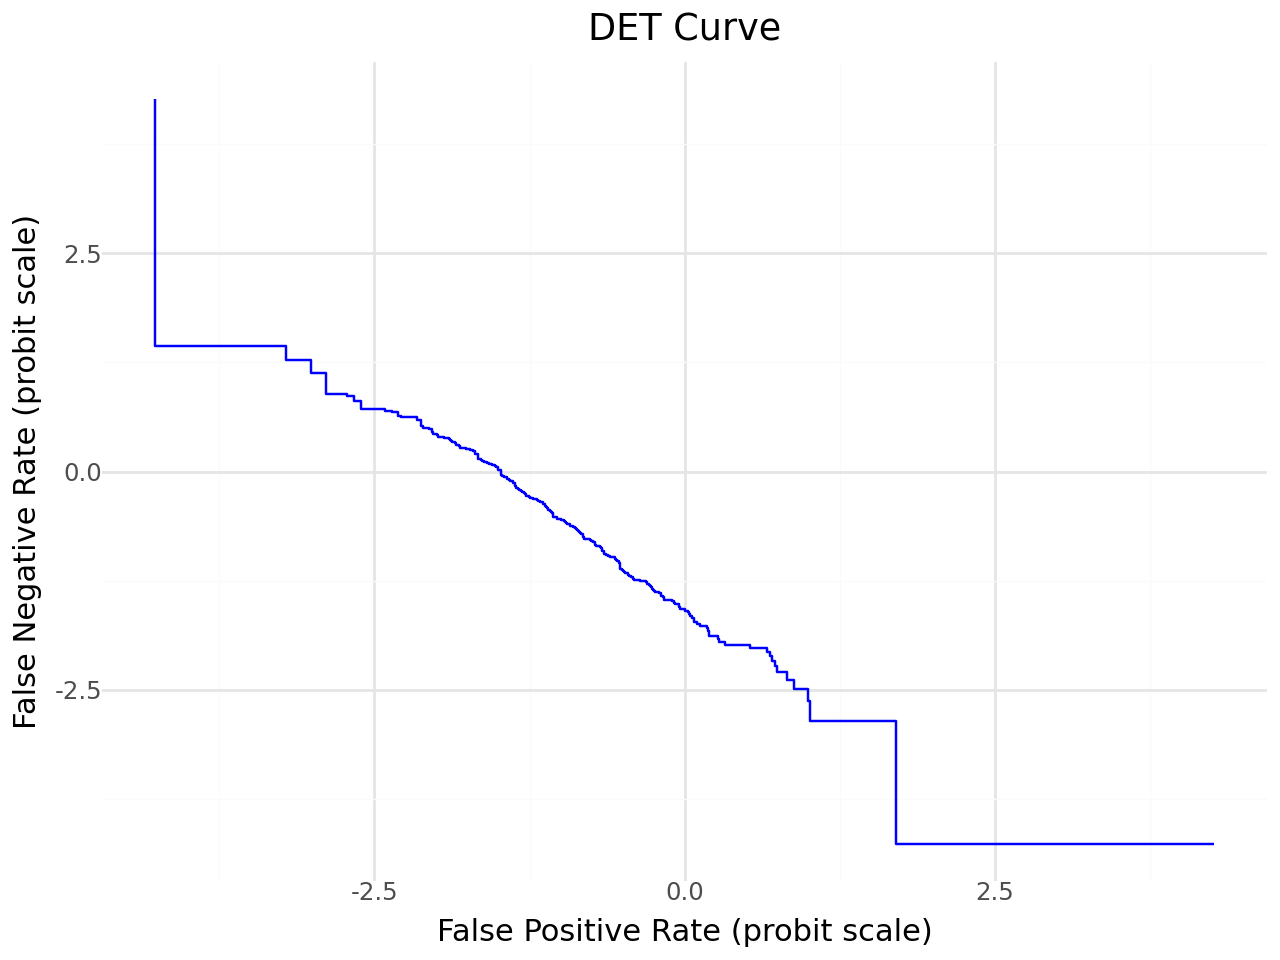

In [60]:
from scipy.stats import norm
import pandas as pd
from sklearn.metrics import roc_curve
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

# Get predicted probabilities for the positive class
p_hat = logistic_model.predict_proba(X_train_scaled)[:, 1]

# Compute the ROC curve to obtain FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_train, p_hat)

# Calculate the False Negative Rate (FNR) as 1 - TPR
fnr = 1 - tpr

# To avoid infinities in the probit transformation, clip FPR and FNR
epsilon = 1e-5
fpr_clipped = fpr.clip(epsilon, 1 - epsilon)
fnr_clipped = fnr.clip(epsilon, 1 - epsilon)

# Apply the probit (inverse normal CDF) transformation
det_x = norm.ppf(fpr_clipped)  # Probit transformation of FPR
det_y = norm.ppf(fnr_clipped)  # Probit transformation of FNR

# Create a DataFrame for plotting the DET curve
det_df = pd.DataFrame({
    'det_x': det_x,
    'det_y': det_y
})

# Plot the DET curve using plotnine
det_plot = (ggplot(det_df, aes(x='det_x', y='det_y')) +
            geom_line(color='blue') +
            labs(title='DET Curve', x='False Positive Rate (probit scale)', y='False Negative Rate (probit scale)') +
            theme_minimal()
            )

det_plot


Interpret the DET curve

The DET (Detection Error Tradeoff) curve shows the tradeoff between the False Positive Rate (FPR) and False Negative Rate (FNR) at various thresholds so when fpr is -2.r dnr is about .5 and when fpr is 0 fnr is about -1.2